# CNN Bart-Homer 

In [225]:
#!pip3 install tensorflow
#!pip3 install keras


### imports

In [226]:
import tensorflow as tf
import keras as K

In [227]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from IPython.display import display, Image
from PIL import Image as PilImage

### Inicializando

In [228]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [229]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [230]:
# Segunda Camada de Convolução
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [231]:
# Terceira Camada de Convolução
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [232]:
classifier.add(Flatten())

In [233]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [234]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Justificativas:**

- Aumento Gradual de Filtros e Redução de Dimensionalidade:Aumentar o número de filtros nas camadas de convolução permite que a rede aprenda características mais complexas. A redução de dimensionalidade através do pooling ajuda a manter a eficiência computacional.
- Função de Ativação ReLU: ReLU é escolhida por sua simplicidade e eficácia na introdução de não linearidade.
- Sigmoid na Camada de Saída: Sigmoid é apropriada para problemas de classificação binária, fornecendo probabilidades bem calibradas.

## Treinando a Rede Neural Convolucional


Aumentar a diversidade dos dados de treinamento, tornando o modelo mais robusto a diferentes variações nos dados reais.

In [235]:

#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)


Preparando para treinar

In [236]:
training_set = train_datagen.flow_from_directory('training_set',target_size = (64, 64),batch_size = 32, class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('test_set', target_size = (64, 64), batch_size = 32,class_mode = 'binary')

Found 196 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


### Treinamento

In [237]:
def custom_generator(generator):
    while True:
        data = next(generator)
        yield data

repeating_training_set = custom_generator(training_set)

classifier.fit_generator(repeating_training_set,  steps_per_epoch=500, epochs=5, validation_data=validation_set,  validation_steps=25)

Epoch 1/5


/var/folders/6k/gtqfbwld7gs1f1sc0d3yy6lc0000gn/T/ipykernel_71713/1755824831.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(repeating_training_set,  steps_per_epoch=500, epochs=5, validation_data=validation_set,  validation_steps=25)


500/500 [==============================] - 15s 30ms/step - loss: 0.2059 - accuracy: 0.9025 - val_loss: 1.0163 - val_accuracy: 0.8588
Epoch 2/5
500/500 [==============================] - 15s 30ms/step - loss: 0.0052 - accuracy: 0.9987
Epoch 3/5
500/500 [==============================] - 15s 30ms/step - loss: 1.7203e-04 - accuracy: 1.0000
Epoch 4/5
500/500 [==============================] - 15s 31ms/step - loss: 5.1108e-05 - accuracy: 1.0000
Epoch 5/5
500/500 [==============================] - 15s 30ms/step - loss: 2.8155e-05 - accuracy: 1.0000


- *steps_per_epoch* e *validation_steps* são ajustados para garantir que cada época tenha uma quantidade adequada de iterações, permitindo uma cobertura suficiente dos dados.
- Número de Épocas: O treinamento é configurado para 5 épocas, um número comum para iniciar a avaliação.

### Previsões

1/1 [==============================] - 0s 36ms/step


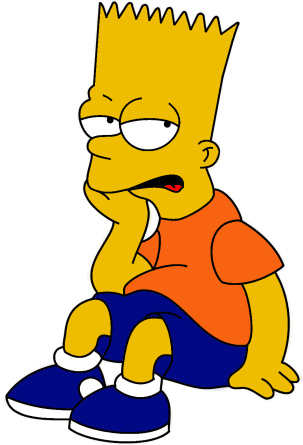

'Bart'

In [238]:

# Open the image file
img = PilImage.open('test_set/bart/bart27.bmp')
# Convert the image to PNG -> necessary for test consistency
img.save('test_set/bart/bart27.png')

test_image = image.load_img('test_set/bart/bart27.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/bart/bart27.png'))
prediction

1/1 [==============================] - 0s 12ms/step


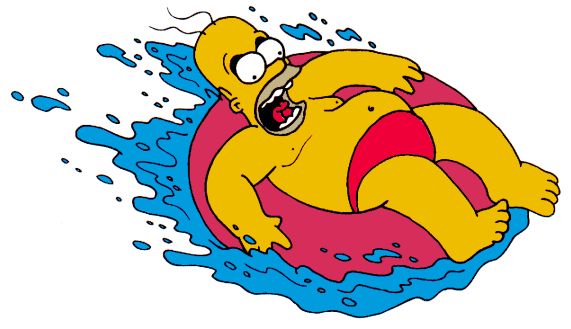

'Homer'

In [239]:
# Open the image file
img = PilImage.open('test_set/homer/homer27.bmp')
# Convert the image to PNG
img.save('test_set/homer/homer27.png')

test_image = image.load_img('test_set/homer/homer27.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/homer/homer27.png'))
prediction

1/1 [==============================] - 0s 11ms/step


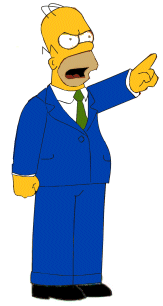

'Homer'

In [240]:
# Open the image file
img = PilImage.open('test_set/homer/homer47.bmp')
# Convert the image to PNG
img.save('test_set/homer/homer47.png')

test_image = image.load_img('test_set/homer/homer47.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/homer/homer47.png'))
prediction

1/1 [==============================] - 0s 11ms/step


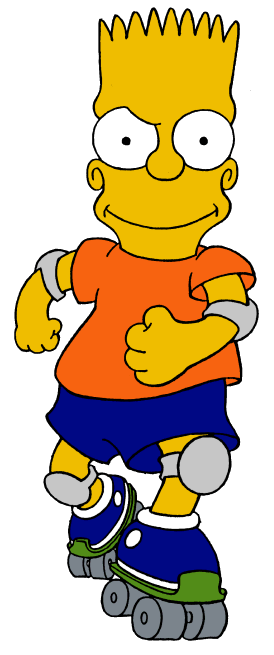

'Bart'

In [241]:
# Open the image file
img = PilImage.open('test_set/bart/bart23.bmp')
# Convert the image to PNG
img.save('test_set/bart/bart23.png')

test_image = image.load_img('test_set/bart/bart23.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/bart/bart23.png'))
prediction

1/1 [==============================] - 0s 12ms/step


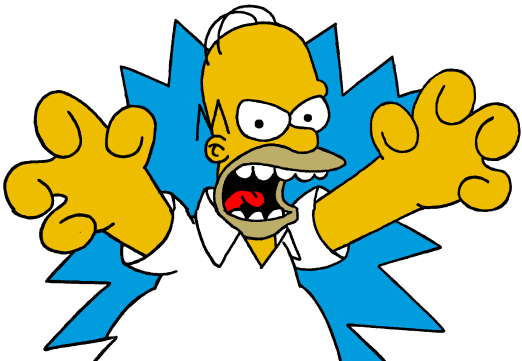

'Homer'

In [242]:
# Open the image file
img = PilImage.open('test_set/homer/homer16.bmp')
# Convert the image to PNG
img.save('test_set/homer/homer16.png')

test_image = image.load_img('test_set/homer/homer16.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/homer/homer16.png'))
prediction

1/1 [==============================] - 0s 11ms/step


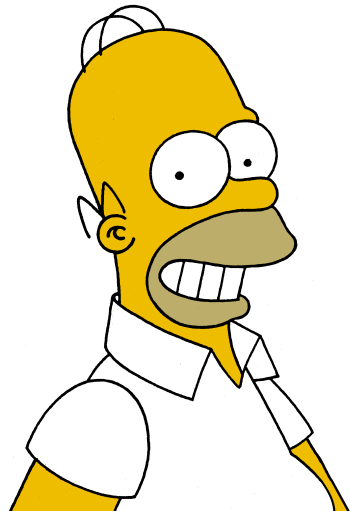

'Bart'

In [243]:
# Open the image file
img = PilImage.open('test_set/homer/homer3.bmp')
# Convert the image to PNG
img.save('test_set/homer/homer3.png')

test_image = image.load_img('test_set/homer/homer3.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/homer/homer3.png'))
prediction

In [244]:
# Evaluate the model
score = classifier.evaluate(validation_set, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3372396230697632
Test accuracy: 0.929411768913269


### Conclusão
Obteve-se um resultado final de 92,94% de precisão para o nosso conjunto de treino. Dos 6 testes realizados de amostra, o modelo acertou 5. Apesar de ser o contrário do que pensei o teste com imagens redimensionadas para 128x128 ao invés de 64x64 reduziu a acurácia do modelo, mantendo- o em 64. Ainda, a alteração do número de passos por época de 100 para 500 melhorou a acurácia então foi mantido.
